In [53]:
import glob
import zipfile
import os
import pycountry
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
with zipfile.ZipFile("202405.zip", "r") as zfile:
    zfile.extractall()
os.remove("202405.zip")

In [ ]:
files = glob.glob("F:/python basic/dataAnalysis/project/202405/2024*.zip")

for file in files:
    extraction_path = f"F:/python basic/dataAnalysis/project/202405/{os.path.splitext(os.path.basename(file))[0]}/"
    with zipfile.ZipFile(file, "r") as zfile2:
        zfile2.extractall(extraction_path)
    os.remove(file)

In [5]:
#Q1
match_away_team_info = pd.read_csv('df/df_away_team_1.csv').drop_duplicates(subset='match_id', keep='first')
match_home_team_info = pd.read_csv('df/df_home_team_1.csv').drop_duplicates(subset='match_id', keep='first')
total_team_info = pd.merge(match_away_team_info, match_home_team_info, how='outer')
total_team_info['player_id'].nunique()

2352

In [28]:
#Q2
total_team_info['height'].mean()

np.float64(1.8194051990013218)

In [45]:
#Q4
match_time_info = pd.read_csv('df/df_time.csv').drop_duplicates(subset='match_id', keep='first')
match_time_info['Total'] = match_time_info.iloc[:, 1:5].sum(axis=1)
match_time_info.loc[match_time_info['Total'].idxmax(), 'match_id']

np.int64(12346747)

In [17]:
#Q5
organized_game_info = pd.read_csv('df/df_pbp.csv').groupby(['match_id', 'game_id'])['set_id'].max().reset_index()
organized_game_info['set_id'].value_counts()

set_id
2    43965
3    15940
1     7054
4      289
5      202
Name: count, dtype: int64

In [11]:
#Q6
organized_team_info = total_team_info.drop_duplicates(subset='player_id', keep='first').groupby('country')['total_prize'].mean().reset_index()
organized_team_info.sort_values(ascending=False,by = 'total_prize')

,country,total_prize
76,Serbia,3.962385e+06
7,Belarus,3.408318e+06
87,Tunisia,2.791494e+06
81,Spain,2.358158e+06
32,Greece,2.199077e+06
...,...,...
63,Nigeria,5.020500e+03
48,Kyrgyzstan,4.413000e+03
61,New Caledonia,3.149000e+03
37,Iran,2.980000e+03


In [13]:
#Q7
period_info = pd.read_csv('df/df_statistics.csv')
period_info.groupby('match_id')['statistic_name'].apply(lambda x: (x == 'aces').sum()).mean()

np.float64(6.49257025158158)

In [14]:
#Q8
organized_period_info = period_info.groupby('match_id')['statistic_name'].apply(lambda x: (x == 'double_faults').sum()).reset_index(name='double_faults')
pd.merge(match_away_team_info, organized_period_info, how='outer').groupby('gender')['double_faults'].mean()

gender
F    6.416489
M    6.624333
Name: double_faults, dtype: float64

In [60]:
#Q10
total_team_info = pd.merge(match_away_team_info, match_home_team_info, how='outer')
total_team_info['height'].corr(total_team_info['total_prize'])

np.float64(0.026991266496057816)

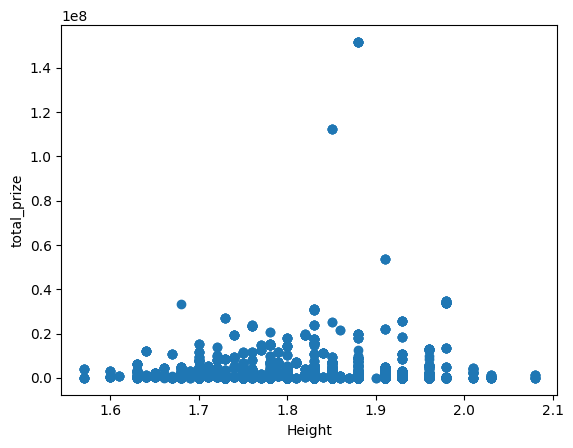

In [61]:
plt.scatter(total_team_info['height'], total_team_info['total_prize'])
plt.xlabel('Height')
plt.ylabel('total_prize')
plt.show()

In [127]:
#Q11
match_time_info[match_time_info['Total'] != 0]['Total'].mean()

np.float64(7331.208374223094)

In [136]:
#Q12
game_info = pd.read_csv('df/df_pbp.csv')
organized_game_info_2 = game_info.groupby(['match_id', 'set_id'])['game_id'].mean().reset_index(name='mean_game_id')
pd.merge(match_away_team_info, organized_game_info_2, how='outer').groupby('gender')['mean_game_id'].mean()

gender
F    5.037571
M    5.211970
Name: mean_game_id, dtype: float64

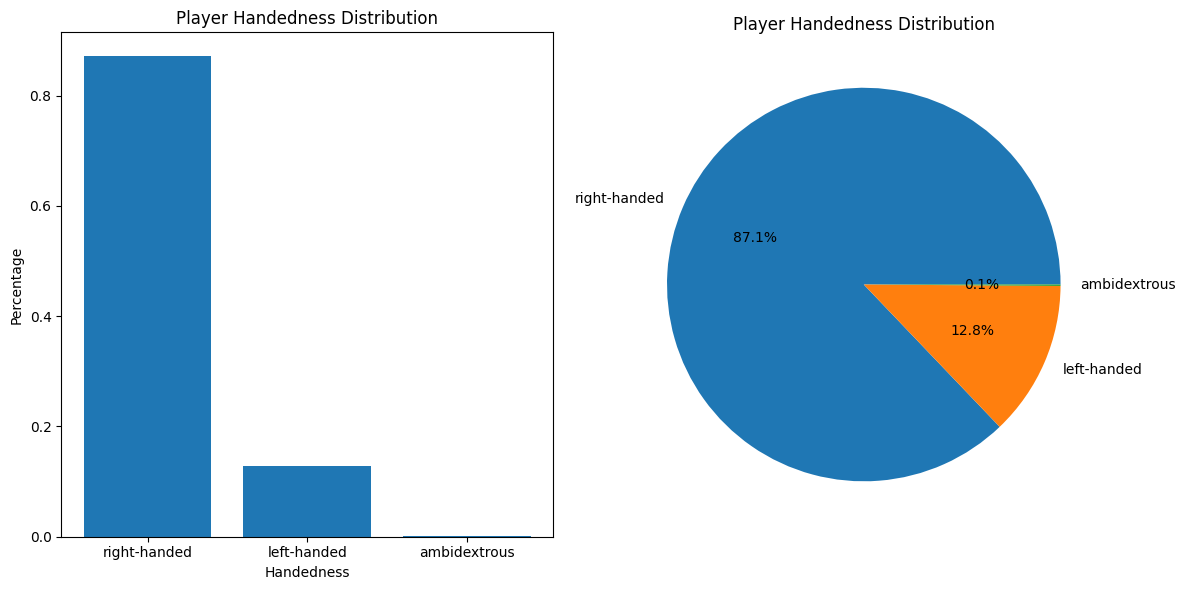

In [14]:
#Q13
match_away_team_info = pd.read_csv('df/df_away_team_1.csv').drop_duplicates(subset='match_id', keep='first')
match_home_team_info = pd.read_csv('df/df_home_team_1.csv').drop_duplicates(subset='match_id', keep='first')
total_team_info = pd.merge(match_away_team_info, match_home_team_info, how='outer')
handedness_count = total_team_info['plays'].value_counts(normalize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot
ax1.bar(handedness_count.index, handedness_count.values)
ax1.set_xlabel('Handedness')
ax1.set_ylabel('Percentage')
ax1.set_title('Player Handedness Distribution')
ax1.tick_params(axis='x', labelrotation=0)

# Pie chart
ax2.pie(handedness_count.values, labels=handedness_count.index, autopct='%1.1f%%')
ax2.set_title('Player Handedness Distribution')

plt.tight_layout()
plt.show()

In [15]:
#Q14
pd.read_csv('df/df_tournament.csv').drop_duplicates(subset='tournament_id', keep='first').groupby('ground_type')['tournament_id'].count().reset_index()

,ground_type,tournament_id
0,Hardcourt indoor,4
1,Hardcourt outdoor,75
2,Red clay,213
3,Synthetic outdoor,2


In [59]:
#Q15

match_venue_info = pd.read_csv('df/df_venue.csv').drop_duplicates(subset='match_id', keep='first')
a = match_venue_info['country'].unique()
match_total_info = pd.merge(match_away_team_info, match_home_team_info, how='outer')
residence_country = match_total_info['residence'].unique()

# Create a list of valid countries using pycountry
valid_countries = [country.name for country in pycountry.countries]

# Obtain the unique countries
unique_countries = []
for place in residence_country:
    if isinstance(place, str):
        if ',' in place:
            country = place.split(',')[-1].strip()
        else:
            country = place
        
        # Validate the extracted country name using the valid_countries list
        if country in valid_countries:
            unique_countries.append(country)

# Remove duplicate countries and convert to NumPy array
unique_countries = np.array(list(set(unique_countries)))

total_countries = np.concatenate((match_total_info['country'], match_venue_info['country'], unique_countries))
len(np.unique(total_countries))


103

In [57]:
#Q17
period_info = pd.read_csv('df/df_statistics.csv')
organized_period_info = period_info[period_info['statistic_name'] == 'break_points_converted'].groupby('match_id').size().reset_index(name='total')
organized_period_info['total'].mean()

np.float64(6.49257025158158)